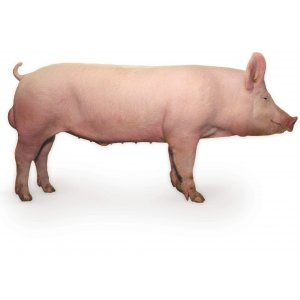

In [3]:
from IPython.display import Image,display
path = "../picture/pig.jpg"
display(Image(filename=path))

In [5]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = path
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02395406', 'hog', 0.98398596), ('n02396427', 'wild_boar', 0.0074134255), ('n03935335', 'piggy_bank', 0.006954492)]


In [18]:
import os
import numpy as np
import torch
import torch.nn
import torchvision.models as models
from torch.autograd import Variable 
import torch.cuda
import torchvision.transforms as transforms
from PIL import Image

resnet50=models.resnet50(pretrained=True).eval()

img=Image.open(path)
img=img.resize((224,224))
img = np.array(img).copy().astype(np.float32)

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
img /= 255.0
img = (img - mean) / std
img = img.transpose(2, 0, 1)

img=np.expand_dims(img, axis=0)
img = Variable(torch.from_numpy(img).float())

label=np.argmax(resnet50(img).data.cpu().numpy())
print("label={}".format(label))

(224, 224, 3)
label=341


In [19]:
print('Predicted:', decode_predictions(resnet50(img).data.cpu().numpy(), top=3)[0])

Predicted: [('n02395406', 'hog', 15.661886), ('n02396427', 'wild_boar', 10.353137), ('n03935335', 'piggy_bank', 10.098382)]


In [22]:
from mxnet import gluon
import mxnet as mx
from mxnet.gluon import nn
from mxnet import ndarray as nd
from mxnet import autograd
import numpy as np

resnet=mx.gluon.model_zoo.vision.resnet50_v2(pretrained=True)

img=Image.open(path)
img=img.resize((224,224))
img = np.array(img).copy().astype(np.float32)

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
img /= 255.0
img = (img - mean) / std
img = img.transpose(2, 0, 1)

img=np.expand_dims(img, axis=0)
array = mx.nd.array(img)

outputs=resnet(array).asnumpy()
label = np.argmax(outputs)
print(label)


341
